In [10]:
# Update the data file with sequence length and corresponding time from all log files
import os
import re

log_dir = 'logs/'
data_file = 'data_A100.txt'

with open(data_file, 'a') as df:  # Open the file in append mode
    for log_filename in os.listdir(log_dir):
        if log_filename.endswith('.log'):
            with open(os.path.join(log_dir, log_filename), 'r') as log_file:
                for line in log_file:
                    match = re.search(r'length (\d+),.*in (\d+\.\d+)s', line)
                    if match:
                        length = match.group(1)
                        seconds = match.group(2)
                        output_line = f'{length} {seconds}\n'
                        df.write(output_line)
                        # print(output_line, end='')

R-squared: 0.9370
Fit equation: y = 1.5047 * exp(0.0046 * x)


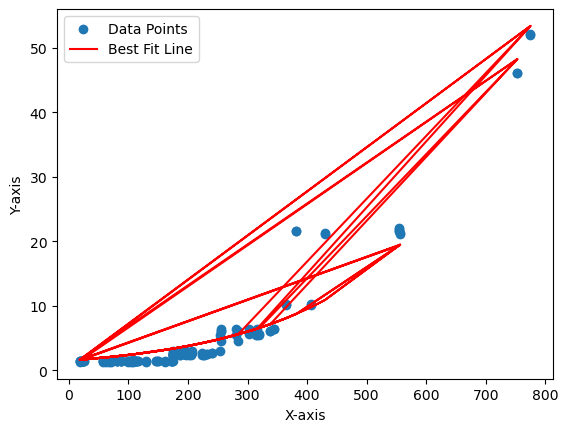

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def exp_func(x, a, b):
    return a * np.exp(b * x)

# Load the data
x, y = np.loadtxt('data_A100.txt', delimiter=' ', unpack=True)

initial_guess = [1, 0.01]

# Fit the curve with the data
popt, pcov = curve_fit(exp_func, x, y, p0=initial_guess)

fitLine = exp_func(x, *popt)

r_squared = r2_score(y, fitLine)
print(f'R-squared: {r_squared:.4f}')

print(f'Fit equation: y = {popt[0]:.4f} * exp({popt[1]:.4f} * x)')

# Clear the current figure before adding new plot
plt.clf()

# Plot the data points
plt.scatter(x, y, label='Data Points')

# Plot the best fit line
plt.plot(x, fitLine, color='red', label='Best Fit Line')

# Add labels and a legend to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()
